# Text Classification Using Naive Bayes

### Life cycle of Machine learning Project

-  Understanding the Problem Statement
-  Data Collection
-  Data Checks to perform
-  Exploratory data analysis
-  Data Pre-Processing
-  Model Training
-  Choose best model

## 1) Problem statement

-  Develop a text classification model using Naive Bayes algorithm to categorize documents and domains into their respective newsgroups based on 20 Newsgroups dataset.

## 2) Data Collection
-  Dataset Source - https://www.kaggle.com/datasets/crawford/20-newsgroups
-  The data consists of approximately 20,000 newsgroup documents partitioned across 20 different news categoried column

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and scikit-learn library**

In [1]:
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

**Importing the data from sklearn**

In [2]:
data = fetch_20newsgroups()

**Test-Train data spliting**

In [3]:
categories = ['sci.med','sci.space','talk.politics.misc','rec.sport.baseball']
train_data = fetch_20newsgroups(subset ="train", categories= categories, shuffle = True)
test_data = fetch_20newsgroups(subset ="test", categories= categories, shuffle = True)

**Shape of the train test data**

In [4]:
list(train_data.filenames.shape), list(test_data.filenames.shape)

([2249], [1497])

In [5]:
categories

['sci.med', 'sci.space', 'talk.politics.misc', 'rec.sport.baseball']

## 2.2 Dataset information
-  Contains 4 categories of news.
    -  sci.mad
    -  sci.space
    -  talk.politics
    -  sports.baseball

## 3) Data Checks to perform
-  Check the various categories present in the the dataset
-  Check statistics of data set
  

### 3.1 Check the various categories present in the the dataset

In [6]:
list(train_data.target_names), list(test_data.target_names)

(['rec.sport.baseball', 'sci.med', 'sci.space', 'talk.politics.misc'],
 ['rec.sport.baseball', 'sci.med', 'sci.space', 'talk.politics.misc'])

### 3.2 Check statistics of data set

In [7]:
categories, frequency_train = np.unique(train_data.target, return_counts=True)
categories, frequency_train

(array([0, 1, 2, 3]), array([597, 594, 593, 465]))

## 4) Exploring Data ( Visualization )

In [8]:
categories = np.array(train_data.target_names)

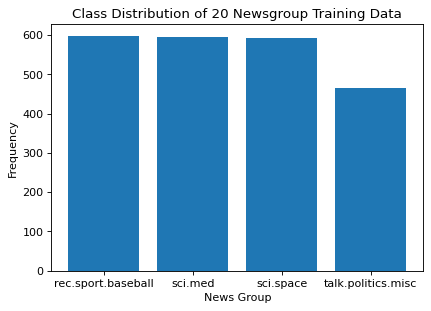

In [9]:
plt.figure(figsize=(6,4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(categories, frequency_train)
plt.title("Class Distribution of 20 Newsgroup Training Data")
plt.xlabel("News Group")
plt.ylabel("Frequency")
plt.show()

In [10]:
categories, frequency_test= np.unique(test_data.target, return_counts=True)
categories = np.array(test_data.target_names)

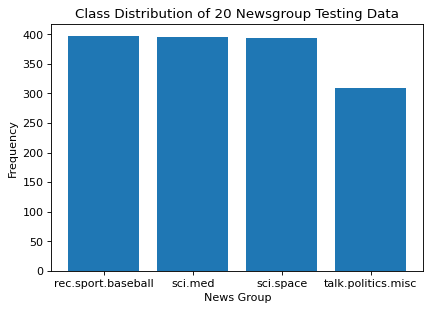

In [11]:
plt.figure(figsize=(6,4), dpi=80, facecolor='w', edgecolor='k')
plt.bar(categories, frequency_test)
plt.title("Class Distribution of 20 Newsgroup Testing Data")
plt.xlabel("News Group")
plt.ylabel("Frequency")
plt.show()

## 5) Data Pre-preproocessing

### 5.1 Text Cleaning

-  Tokenize the Text Data
-  Remove Stopwords and Punctuation

In [12]:
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

# Function to clean text
def clean_text(text):
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and punctuation
    filtered_words = [word for word in words if word.lower() not in stop_words and word not in punctuations]
    return ' '.join(filtered_words)

# Apply the function to the training and testing data
cleaned_train_texts = [clean_text(text) for text in train_data.data]
cleaned_test_texts = [clean_text(text) for text in test_data.data]

### 5.2 Text Encoding

In [13]:
tv = TfidfVectorizer()

In [14]:

# Encoding the train_data
encoded_train_data = tv.fit_transform(cleaned_train_texts)

# Encoding the test_data
encoded_test_data = tv.fit_transform(cleaned_test_texts)